------------------------------------------------- Exploratory Data Analysis -----------------------------------------------

In [2]:
# importing the required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [3]:
# Reading a csv file

df = pd.read_csv('Train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#  fill the missing value with previous one
df.fillna(method='pad' , inplace = True)

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,6.0,14.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,14.0,14.0,7969


In [5]:
# fill the missing values with next one
df.fillna(method = 'bfill' , inplace = True)

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,6.0,14.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,6.0,14.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,14.0,14.0,7969


In [6]:
from scipy.stats.mstats import winsorize

print("Highest allowed",df['Purchase'].mean() + 3*df['Purchase'].std())
print("Lowest allowed",df['Purchase'].mean() - 3*df['Purchase'].std())

# So, data above heighest allowed and below lowest allowed will be the categorized as outliers.

Highest allowed 24333.164894420872
Lowest allowed -5805.2274685026205


In [7]:
print(df[(df['Purchase'] < -5805.2274685026205) | (df['Purchase'] > 24333.164894420872)])


Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase]
Index: []


In [8]:
# Trimming of Outliers
new_df = df[(df['Purchase'] > -5805.2274685026205) | (df['Purchase'] < 24333.164894420872)]

print(new_df['Purchase'])

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64


In [9]:
# Checking the shape of both the dataframes
print("Shape of old dataframe is : ", df.shape)
print("Shape of new dataframe is : ", new_df.shape)

# Hence no outliers are their
# So, we can use the old dataframe also.

Shape of old dataframe is :  (550068, 12)
Shape of new dataframe is :  (550068, 12)


In [10]:
# Converting a catagorical data into the numeric one using encoding.

# -------------------------------- One Hot Encoding --------------------------------
# When we have text data in the input then we use one hot encoding


# create dymmy variables
pd.get_dummies(df['Gender'])



,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
550063,0,1
550064,1,0
550065,1,0
550066,1,0


In [11]:
# create dymmy variables
pd.get_dummies(df['City_Category'])


,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
550063,0,1,0
550064,0,0,1
550065,0,1,0
550066,0,0,1


In [12]:
from sklearn.preprocessing import MinMaxScaler

arr1 = np.array(df['Occupation'])

data = arr1.reshape(4,137517)

# define min max scaler
scaler = MinMaxScaler() # means you are doing normalization

# transform data
scaled = scaler.fit_transform(data) # fit_transform is used to for normailzation
print(scaled)

print(scaled.min()) # we will get min value as 0
print(scaled.max()) # we will get max value as 1




[[0.33333333 0.625      0.625      ... 1.         1.         1.        ]
 [1.         1.         1.         ... 0.         0.4        0.4375    ]
 [0.         0.         0.         ... 0.875      0.86666667 0.875     ]
 [0.77777778 0.875      0.875      ... 0.9375     0.         0.        ]]
0.0
1.0000000000000002


In [17]:
# Measure of Central Tendency

print("Mean of the purchase is : ", df['Purchase'].mean())
print("Median of the purchase is : ", df['Purchase'].median())
print("Mode of the purchase is : ", df['Purchase'].mode())


Mean of the purchase is :  9263.968712959126
Median of the purchase is :  8047.0
Mode of the purchase is :  0    7011
Name: Purchase, dtype: int64


In [18]:
# Measure of spread and variablility

print("Variance of the purchase is : ", df['Purchase'].var())
print("Standard deviation of the purchase is : ", df['Purchase'].std())



Variance of the purchase is :  25231185.950597923
Standard deviation of the purchase is :  5023.065393820582


In [15]:
df['Purchase'].skew()

# Since skewness is in b/w 0.5 and 1 i.e Positive skewness

0.6001400037087128

In [16]:
df['Purchase'].kurt()

# Since K < 3 it means platykurtosis

-0.3383775655851702

In [26]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001654,0.001238,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000985,0.003814,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.014712,0.012117,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.297925,0.049417,-0.343703
Product_Category_2,0.001654,-0.000985,0.014712,0.297925,1.000000,0.235211,-0.131313
Product_Category_3,0.001238,0.003814,0.012117,0.049417,0.235211,1.000000,0.008612
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.131313,0.008612,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x2c6160414e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c616041a80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c616023f70>],
 'medians': [<matplotlib.lines.Line2D at 0x2c616042020>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c6160422f0>],
 'means': []}

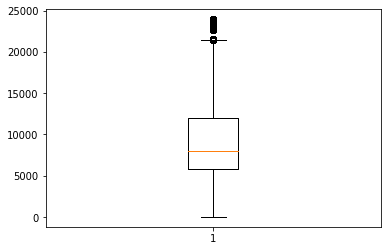

In [21]:
plt.boxplot(df['Purchase'] , vert=False)

(array([ 36844.,  57919., 132275., 104918.,  76784.,  30178.,  64558.,
         12695.,  31539.,   2358.]),
 array([1.20000e+01, 2.40690e+03, 4.80180e+03, 7.19670e+03, 9.59160e+03,
        1.19865e+04, 1.43814e+04, 1.67763e+04, 1.91712e+04, 2.15661e+04,
        2.39610e+04]),
 <BarContainer object of 10 artists>)

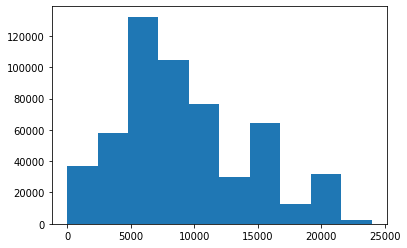

In [20]:
plt.hist(df['Purchase'])